In [2]:
import os
import numpy as np
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.pylab import plt
from tqdm.notebook import tqdm
from IPython.display import clear_output

# %matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12);

In [3]:
dataset_dir = "/home/val/soil_erosion/imagery/2018_dataset"

In [4]:
if os.path.exists("chip_index.csv"):
    chips_df = pd.read_csv("chip_index.csv")
else:
    chips_df = pd.DataFrame(columns=["img_path", "mask_path", "skip"])

def show_masks(imgs, chips_df=chips_df):
    for num in range(len(imgs)):
        img = np.load(imgs[num])
        mask = np.load(imgs[num].replace("tiles", "masks"))
        
        fig, axes = plt.subplots(1, 2, figsize = (15, 12))

        axes[0].set_title('Raster')
        axes[0].imshow(img[1:].transpose(1,2,0))

        axes[1].set_title('GT mask')
        axes[1].imshow(mask, cmap='gray')
            
        plt.tight_layout()
        plt.show()
        skip_flag = input("Skip image?")
        d = {
            "img_path": imgs[num],
            "mask_path": masks[num],
            "skip": int(skip_flag)
        }
            
        chips_df = chips_df.append(d, ignore_index=True)
        chips_df.to_csv("chip_index.csv", index=False)
        clear_output(wait=True)

In [5]:
if os.path.exists("chip_index.csv"):
    chips_df = pd.read_csv("chip_index.csv")
else:
    chips_df = pd.DataFrame(columns=["img_path", "mask_path", "skip"])

def show_masks(imgs, chips_df=chips_df):
#     def _click_skip(_):
#         d = {
#             "img_path": imgs[num],
#             "mask_path": masks[num],
#             "skip": int(1)
#         }
            
#         chips_df = chips_df.append(d, ignore_index=True)
#         chips_df.to_csv("chip_index.csv", index=False)
#     def _click_keep(_):
#         d = {
#             "img_path": imgs[num],
#             "mask_path": masks[num],
#             "skip": int(0)
#         }
            
#         chips_df = chips_df.append(d, ignore_index=True)
#         chips_df.to_csv("chip_index.csv", index=False)
    
    for num in range(len(imgs)):
        img = np.load(imgs[num])
        mask = np.load(imgs[num].replace("tiles", "masks"))
        
        fig, axes = plt.subplots(1, 2, figsize = (15, 12))

        axes[0].set_title('Raster')
        axes[0].imshow(img[1:].transpose(1,2,0))

        axes[1].set_title('GT mask')
        axes[1].imshow(mask, cmap='gray')
            
        plt.tight_layout()
        plt.show()
        skip_flag = input("Skip image?")
        
        d = {
            "img_path": imgs[num],
            "mask_path": masks[num],
            "skip": int(skip_flag)
        }
            
        chips_df = chips_df.append(d, ignore_index=True)
        chips_df.to_csv("chip_index.csv", index=False)

        clear_output(wait=True)

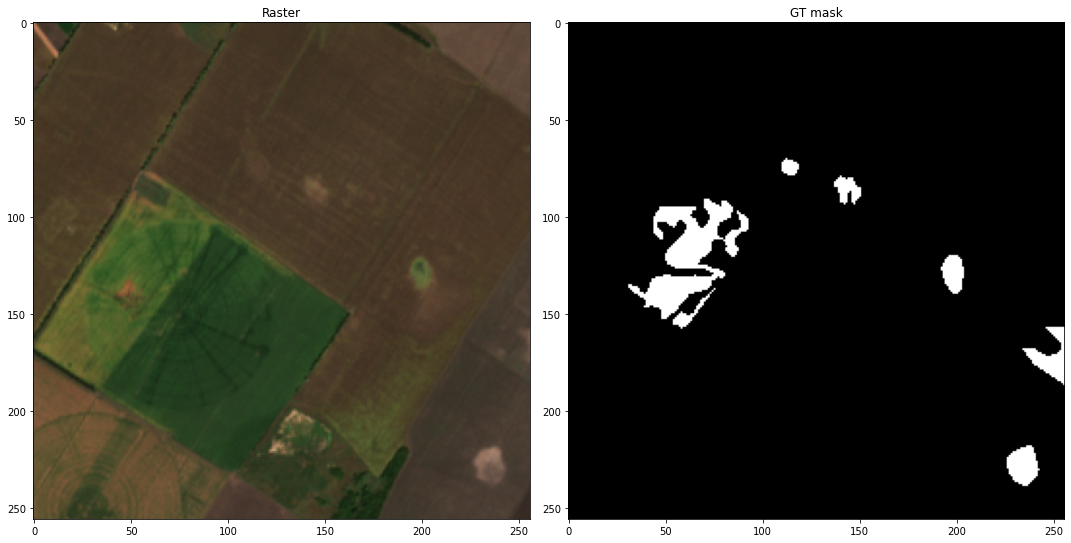

KeyboardInterrupt: Interrupted by user

In [6]:
imgs = [os.path.join(dataset_dir, "tiles", x) for x in os.listdir(dataset_dir+"/tiles")]
masks = [os.path.join(dataset_dir, "masks", x) for x in os.listdir(dataset_dir+"/masks")]

imgs = [x for x in imgs if x not in chips_df.img_path.tolist()]

show_masks(imgs)

In [8]:
chips_df.skip.value_counts()

1    1338
0     333
Name: skip, dtype: int64

In [10]:
# chips_df[chips_df.skip==0]